In [83]:
import pandas as pd

In [84]:

columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"]

data = pd.read_csv("../data/imports-85.data", names=columns, na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Missing data found! removing rows with missing data!

In [85]:
dataDropped = data.dropna().reset_index(drop=True)
dataDropped.info()

print(dataDropped)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

For whatever reason, some numbers were written as words! converting to int...

In [86]:
%pip install word2number
from word2number import w2n

strangeColumns = ["num-of-doors", "num-of-cylinders"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = dataDropped[strangeColumns]
standardData = dataDropped[standardColumns]

strangeData = strangeData.map(lambda a : w2n.word_to_num(str(a)))

data = pd.concat([standardData, strangeData], axis=1)
data.info()
print(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   height             159 non-null    float64
 1   highway-mpg        159 non-null    int64  
 2   stroke             159 non-null    float64
 3   make               159 non-null    object 
 4   length             159 non-null    float64
 5   width              159 non-null    float64
 6   fuel-system        159 non-null    object 
 7   curb-weight        159 non-null    int64  
 8   bore               159 non-null    float64
 9   price              159 non-null    float64
 10  horsepower         159 non-null    float64
 11  engine-type        159 non-null    object 
 12  city-mpg           159 non-null    int64  
 13  peak-rpm           159 non-null    float64
 14  symboling          159 non-null    int64  
 15  body-style         159 non-null    object 
 16  engine-size        159 no


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Strings found! Using one-hot encoding to change data to numeric

In [87]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

strangeColumns = ["engine-location", "body-style", "drive-wheels", "engine-type", "fuel-type", "make", "fuel-system", "aspiration"]
standardColumns = list(set(columns) - set(strangeColumns))

strangeData = pd.DataFrame()
standardData = data[standardColumns]

for column in strangeColumns:
    local_cat = data[[column]]  
    local_cat.sample(10)

    encoder = OneHotEncoder()
    local_cat = encoder.fit_transform(local_cat).toarray()
    local_data = pd.DataFrame(local_cat, columns=encoder.get_feature_names_out([column]))
    strangeData = pd.concat([strangeData, local_data], axis=1)
    print(local_data)
dataCleaned = pd.concat([strangeData, standardData], axis=1)
print("#" * 100)
print(data)
#data.info()

     engine-location_front
0                      1.0
1                      1.0
2                      1.0
3                      1.0
4                      1.0
..                     ...
154                    1.0
155                    1.0
156                    1.0
157                    1.0
158                    1.0

[159 rows x 1 columns]
     body-style_convertible  body-style_hardtop  body-style_hatchback  \
0                       0.0                 0.0                   0.0   
1                       0.0                 0.0                   0.0   
2                       0.0                 0.0                   0.0   
3                       0.0                 0.0                   0.0   
4                       0.0                 0.0                   0.0   
..                      ...                 ...                   ...   
154                     0.0                 0.0                   0.0   
155                     0.0                 0.0                   0.

Unscaled values found! Using Standard scaler to scale

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

newColumns = list(dataCleaned.columns.values)

target = ["price", "peak-rpm", "horsepower"]
X = dataCleaned[list(set(newColumns) - set(target))]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train_set_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(train_set_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,fuel-system_spdi,make_bmw,body-style_wagon,make_mazda,engine-location_front,make_porsche,bore,make_subaru,fuel-system_mpfi,body-style_hardtop,...,fuel-system_idi,make_audi,fuel-type_diesel,engine-size,make_peugot,drive-wheels_rwd,make_nissan,body-style_convertible,make_chevrolet,drive-wheels_fwd
0,-0.146647,-0.103142,2.915476,-0.303239,0.0,-0.103142,1.139700,2.763397,1.252025,-0.146647,...,-0.259645,-0.209657,-0.259645,-0.298475,-0.259645,-0.597614,-0.361873,-0.146647,-0.180579,0.695971
1,-0.146647,-0.103142,-0.342997,-0.303239,0.0,-0.103142,-0.612025,-0.361873,-0.798706,-0.146647,...,-0.259645,-0.209657,-0.259645,-0.232379,-0.259645,-0.597614,-0.361873,-0.146647,-0.180579,0.695971
2,-0.146647,-0.103142,2.915476,-0.303239,0.0,-0.103142,-0.984733,-0.361873,-0.798706,-0.146647,...,-0.259645,-0.209657,-0.259645,-0.827243,-0.259645,-0.597614,-0.361873,-0.146647,-0.180579,0.695971
3,-0.146647,-0.103142,-0.342997,-0.303239,0.0,-0.103142,-1.282899,-0.361873,-0.798706,-0.146647,...,-0.259645,-0.209657,-0.259645,-0.893339,-0.259645,-0.597614,-0.361873,-0.146647,-0.180579,0.695971
4,-0.146647,-0.103142,-0.342997,-0.303239,0.0,-0.103142,-0.984733,-0.361873,-0.798706,-0.146647,...,-0.259645,-0.209657,-0.259645,-0.827243,-0.259645,-0.597614,-0.361873,-0.146647,-0.180579,0.695971


from sklearn.linear_model import *

model = Ridge(0.018)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
print(model.coef_)

print(model.predict(X_test) - y_test)

In [89]:
from sklearn.linear_model import *

alphaList = [10 / 1.1 ** i for i in range(100)]
modelList = [
    ["Ridge---------------", lambda a : Ridge(alpha=a, max_iter=50000)],
    ["Lasso---------------", lambda a : Lasso(alpha=a, max_iter=50000)],
    ["Elastic Net .8 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.8)],
    ["Elastic Net .6 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.6)],
    ["Elastic Net .4 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.4)],
    ["Elastic Net .2 ratio", lambda a : ElasticNet(alpha=a, max_iter=50000, l1_ratio=.2)]
]
print(alphaList)

[10.0, 9.09090909090909, 8.264462809917354, 7.513148009015775, 6.830134553650705, 6.2092132305915495, 5.644739300537772, 5.131581182307064, 4.66507380209733, 4.240976183724846, 3.855432894295314, 3.504938994813922, 3.186308177103565, 2.896643797366877, 2.6333125430607973, 2.3939204936916334, 2.176291357901485, 1.9784466890013497, 1.798587899092136, 1.635079908265578, 1.4864362802414344, 1.3513057093103948, 1.2284597357367224, 1.1167815779424748, 1.0152559799477043, 0.9229599817706402, 0.8390545288824002, 0.7627768444385455, 0.6934334949441322, 0.6303940863128475, 0.5730855330116795, 0.5209868481924358, 0.4736244074476689, 0.43056764313424445, 0.39142513012204033, 0.355841027383673, 0.3234918430760664, 0.29408349370551484, 0.2673486306413771, 0.24304420967397916, 0.2209492815217992, 0.20086298320163565, 0.18260271200148695, 0.1660024654558972, 0.15091133223263378, 0.13719212021148527, 0.12472010928316841, 0.1133819175301531, 0.10307447048195735, 0.09370406407450667, 0.08518551279500607,

Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 10.0
   train:    839010.7212594999	   val:      2535618.044021202
   error:    1696607.322761702	   accuracy: 0.7412905250755889
  alpha 9.09090909090909
   train:    817227.0217550982	   val:      2480981.4105443587
   error:    1663754.3887892603	   accuracy: 0.745426441994412
  alpha 8.264462809917354
   train:    795801.5600755229	   val:      2425013.7245031456
   error:    1629212.1644276227	   accuracy: 0.7493946575615773
  alpha 7.513148009015775
   train:    774728.420230562	   val:      2367828.6761369663
   error:    1593100.2559064045	   accuracy: 0.7531877345173613
  alpha 6.830134553650705
   train:    753998.6635807082	   val:      2309545.029514889
   error:    1555546.365934181	   accuracy: 0.7567997833932539
  alpha 6.2092132305915495
   train:    733601.17525785	   val:      2250286.445762984
   error:    1516685.270505134	   accuracy: 0.7

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.007147529030581949
   train:    209281.78483959872	   val:      5151858.369068154
   error:    4942576.584228556	   accuracy: -0.9091883046408537


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.006497753664165407
   train:    209281.54642975554	   val:      5155672.034620502
   error:    4946390.488190747	   accuracy: -0.9141331965631032


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.005907048785604915
   train:    209281.33852555908	   val:      5159136.677624693
   error:    4949855.339099134	   accuracy: -0.9182227472702637


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0053700443505499225
   train:    209281.1572228139	   val:      5161918.374424079
   error:    4952637.2172012655	   accuracy: -0.9222020270575411


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.004881858500499929
   train:    209281.00577631686	   val:      5164230.308561393
   error:    4954949.302785076	   accuracy: -0.9257620934310985


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.004438053182272662
   train:    209280.88061455308	   val:      5166432.072355858
   error:    4957151.191741305	   accuracy: -0.9290839715860401


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.004034593802066057
   train:    209280.7771747748	   val:      5168516.317397827
   error:    4959235.540223053	   accuracy: -0.9321744640715813


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0036678125473327784
   train:    209280.69168754606	   val:      5170479.44108744
   error:    4961198.749399894	   accuracy: -0.9350425503518496


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.851e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0033343750430297986
   train:    209280.62103680332	   val:      5172320.608486562
   error:    4963039.987449759	   accuracy: -0.9376983251270286


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.003031250039117998
   train:    209280.56264806644	   val:      5174040.908233927
   error:    4964760.34558586	   accuracy: -0.9401520264193071


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0027556818537436347
   train:    209280.51439244437	   val:      5175642.864748492
   error:    4966362.350356048	   accuracy: -0.9424137691336384


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002505165321585122
   train:    209280.47426655632	   val:      5177131.123697304
   error:    4967850.649430748	   accuracy: -0.9445701819564265


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002277423019622838
   train:    209280.4375845047	   val:      5178511.315810896
   error:    4969230.878226392	   accuracy: -0.9477587306753676


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.002070384563293489
   train:    209280.40721972054	   val:      5179787.949644652
   error:    4970507.542424932	   accuracy: -0.9508465732331043


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.856e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0018821677848122626
   train:    209280.38201613261	   val:      5180994.014150656
   error:    4971713.632134523	   accuracy: -0.9537948072317853


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.895e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0017110616225566022
   train:    209280.35835059188	   val:      5181764.829508368
   error:    4972484.471157776	   accuracy: -0.9565838250191111


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.903e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.109e+05, tolerance: 1.630e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0015555105659605473
   train:    209280.34488470363	   val:      5180985.0539986715
   error:    4971704.709113968	   accuracy: -0.9592346072110042


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.903e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.133e+05, tolerance: 1.630e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0014141005145095883
   train:    209280.33062181366	   val:      5173331.868204879
   error:    4964051.537583065	   accuracy: -0.9611553691808158


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.902e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.131e+05, tolerance: 1.630e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0012855459222814438
   train:    209280.31882084472	   val:      5167102.3337251935
   error:    4957822.014904349	   accuracy: -0.9629897960264081


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.902e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.129e+05, tolerance: 1.630e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0011686781111649488
   train:    209280.30906796106	   val:      5162041.015588554
   error:    4952760.706520593	   accuracy: -0.9647315557076052


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.902e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.124e+05, tolerance: 1.630e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0010624346465135897
   train:    209280.30100600843	   val:      5157937.402264276
   error:    4948657.101258267	   accuracy: -0.966376750991009


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.902e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+05, tolerance: 1.630e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0009658496786487179
   train:    209280.2939566249	   val:      5154641.634868543
   error:    4945361.340911917	   accuracy: -0.9680168412045838


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.904e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.409e+05, tolerance: 1.630e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0008780451624079253
   train:    209280.28891191687	   val:      5152128.876518096
   error:    4942848.587606179	   accuracy: -0.9694526971704266


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.904e+07, tolerance: 3.110e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.290e+05, tolerance: 1.630e+03
  model = cd_fast.enet_coordinate_descent(


  alpha 0.0007982228749162957
   train:    209280.28390122578	   val:      5150375.748521208
   error:    4941095.464619982	   accuracy: -0.971135609849186

Best alpha: 1.4864362802414344
Generalization error: 2237976.3474231646
Coefficient: [[-1.98462294e+02  4.12991086e+03 -2.53883168e+02  9.48277770e+02
   0.00000000e+00  6.50018938e+03  0.00000000e+00 -3.65155713e+02
   1.50137288e+02 -2.34578001e+02 -1.95039144e+03  1.26489598e+03
   1.66081222e+03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -1.21009180e+02 -4.02423573e+02  2.34270004e+02  1.04253627e+04
   2.39891348e+03 -3.15199099e+03 -3.25919976e+02 -2.10149499e+02
   1.04728826e+02  2.88090746e+02  1.32010861e+01  4.11236933e+02
  -8.67041628e+02 -2.43814232e+02 -1.49713283e+02  1.62457183e+02
   2.13672372e+03  1.69425365e+03  0.00000000e+00  1.14598686e+01
  -0.00000000e+00 -1.74584721e+03 -0.00000000e+00  1.46783614e+03
  -5.28630544e+01  0.00000000e+00 -2.89809456e+01  0.00000000e+00
  -1.37678121e+03  4.66030018e+0

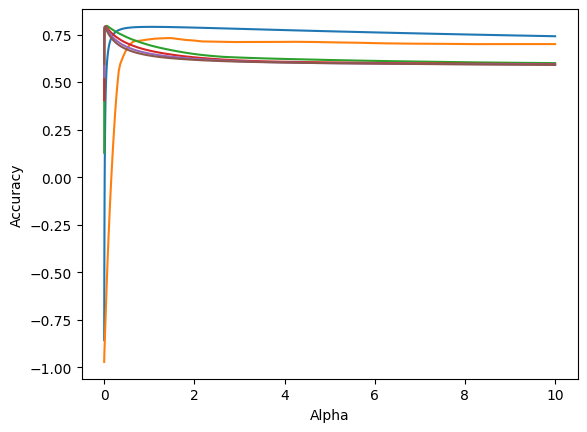

In [90]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train():
    bestest_model = [0, None, "None"]
    for modelStruct in modelList:
        xPoint = []
        yPoint = []
        name, modelCall = modelStruct
        print(f"{name}{"-" * 100}")
        lowestVal = [1000, 0, None, 0, 0, 0]
        for alpha in alphaList:
            model = modelCall(alpha)
            model.fit(X_train, y_train)
    
            #get MSEs
            train_pred = model.predict(X_train)
            train_mse  = mean_squared_error(y_train, train_pred)
            val_pred   = model.predict(X_val)
            val_mse    = mean_squared_error(y_val, val_pred)
            error      = abs(train_mse - val_mse)
            acc        = model.score(X_val, y_val)
            #I PONDERED IF ACCURACY IS PAC OR MODE.SCORE(), IN THE END I USED MODEL.SCORE()
    
            print(f"  alpha {alpha}\n   train:    {train_mse}\t   val:      {val_mse}\n   error:    {error}\t   accuracy: {acc}")
            if (lowestVal[5] < acc):
                lowestVal = [error, alpha, model, train_mse, val_mse, acc]
                if (bestest_model[0] < acc):
                    bestest_model = [acc, model, name]
            xPoint.append(alpha)
            yPoint.append(acc)
        plt.plot(xPoint, yPoint)
        best_model = lowestVal[2]
        #print requirements
        print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    print(f"Best model: {bestest_model[2]}")
    best_model = bestest_model[1]
    print(f"\nBest alpha: {lowestVal[1]}\nGeneralization error: {lowestVal[0]}\nCoefficient: {best_model.coef_}\nIntercept: {best_model.intercept_}\nTrain MSE: {lowestVal[3]}\nVal MSE: {lowestVal[4]}\nAccuracy: {lowestVal[5]}\n\n")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy")
    plt.show()
    return best_model
best_model = train()

    predictedPrice    price
0     27122.175564  31600.0
1     20003.664184  15690.0
2      6761.478928   6855.0
3     16243.705749  18150.0
4     20430.668105  16558.0
5     10140.726263   9538.0
6      8151.876418   6692.0
7      9654.849947  10595.0
8     16142.731033  16515.0
9      6069.706254   5389.0
10    11091.796223   8495.0
11    11670.813318   8449.0
12    20105.886703  22625.0
13     5798.050345   7349.0
14    10828.609859   9298.0
15     7784.474884   9258.0
16    10133.662360   8195.0
17    16744.910028  13499.0
18     5902.399740   7999.0
19     6629.741548   7198.0
20     9740.649223  10345.0
21    10639.355581   8495.0
22     6366.495281   7788.0
23     7006.460860   6229.0
24    10238.964241   9495.0
25     5360.577998   7099.0
26     8219.378922   9095.0
27     9312.406182   8921.0
28    20748.454451  15998.0
29    15860.389984  12940.0
30     8179.309839   7689.0
31    16602.497995  15580.0
    predictedPeak-rpm  peak-rpm
0         4399.911024    4350.0
1         47

<Axes: xlabel='horsepower', ylabel='predictedHorsepower'>

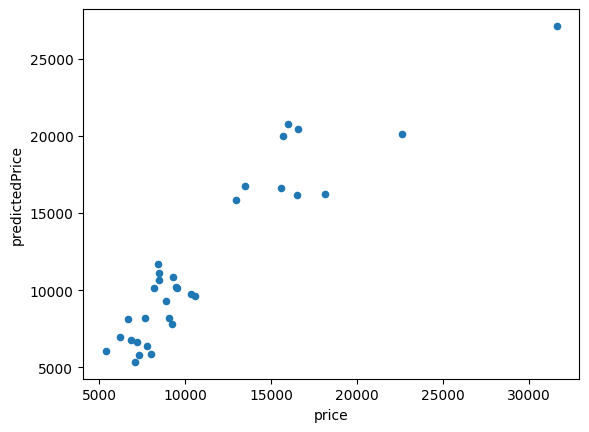

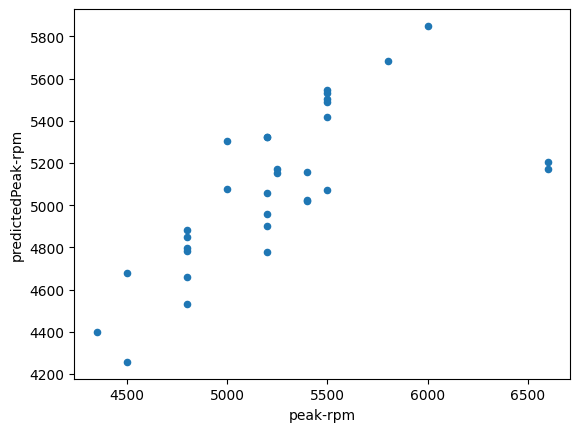

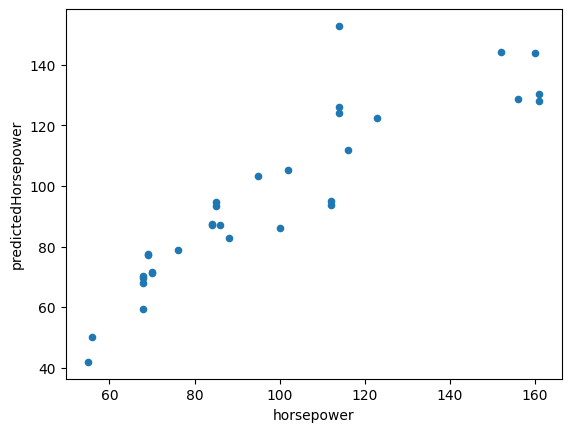

In [91]:
y_pred = best_model.predict(X_test)

y_pred = pd.DataFrame(y_pred, columns=["predictedPrice", "predictedPeak-rpm", "predictedHorsepower"])

print(pd.concat([y_pred[["predictedPrice"]], y_test[["price"]].reset_index(drop=True)], axis=1))
print(pd.concat([y_pred[["predictedPeak-rpm"]], y_test[["peak-rpm"]].reset_index(drop=True)], axis=1))
print(pd.concat([y_pred[["predictedHorsepower"]], y_test[["horsepower"]].reset_index(drop=True)], axis=1))

pd.concat([y_pred[["predictedPrice"]], y_test[["price"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="price", y="predictedPrice")
pd.concat([y_pred[["predictedPeak-rpm"]], y_test[["peak-rpm"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="peak-rpm", y="predictedPeak-rpm")
pd.concat([y_pred[["predictedHorsepower"]], y_test[["horsepower"]].reset_index(drop=True)], axis=1).plot(kind="scatter", x="horsepower", y="predictedHorsepower")

#xPoint, yPoint = [], []
#for i in range(len(y_pred)):
#    xPoint.append(y_pred[i][0])
#    yPoint.append(np.array(y_test, dtype="int")[i][0])
#plt.plot(xPoint, yPoint)

In [92]:
numList = [[newColumns[i], abs(best_model.coef_[2][i])] for i in range(len(best_model.coef_[2]))]
sortList = sorted(numList, key=lambda num: num[1], reverse=True) 
top8 = [sortList[i][0] for i in range(8)]
print(top8)

['fuel-system_spdi', 'city-mpg', 'width', 'make_jaguar', 'aspiration_turbo', 'drive-wheels_rwd', 'compression-ratio', 'num-of-doors']


Ridge-------------------------------------------------------------------------------------------------------------------
  alpha 10.0
   train:    1602269.2531747166	   val:      3393587.4362569004
   error:    1791318.1830821838	   accuracy: 0.44656535556689975
  alpha 9.09090909090909
   train:    1593956.6493476545	   val:      3378554.157772278
   error:    1784597.5084246234	   accuracy: 0.4477177326096125
  alpha 8.264462809917354
   train:    1586000.5205037007	   val:      3363784.2851993456
   error:    1777783.7646956448	   accuracy: 0.44885325779929036
  alpha 7.513148009015775
   train:    1578410.5898944493	   val:      3349330.3888189215
   error:    1770919.7989244722	   accuracy: 0.449966440772124
  alpha 6.830134553650705
   train:    1571195.0278747084	   val:      3335242.0472120433
   error:    1764047.019337335	   accuracy: 0.4510521873468572
  alpha 6.2092132305915495
   train:    1564359.9720027184	   val:      3321564.471254979
   error:    1757204.4992522604	  

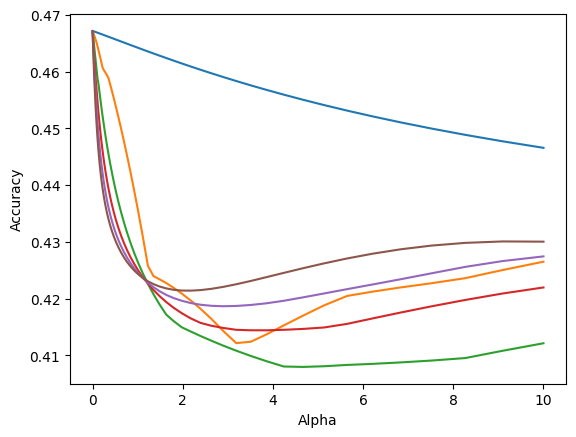

Ridge(alpha=0.0007982228749162957, max_iter=50000)

In [93]:
X = dataCleaned[top8]
y = dataCleaned[target]

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=None)

train()